In [5]:
#Linear Regression with Model Deployment 
import pandas as pd 

In [6]:
df = pd.read_csv('Data/Salary_Data.csv')

In [7]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
df.sample(3)

,YearsExperience,Salary
15,4.9,67938.0
1,1.3,46205.0
12,4.0,56957.0


In [9]:
df.shape

(30, 2)

In [10]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [12]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [13]:
x = df.drop(columns='Salary')

In [14]:
y=df['Salary']

In [15]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [17]:
x_train

,YearsExperience
19,6.0
11,4.0
28,10.3
26,9.5
8,3.2
16,5.1
10,3.9
27,9.6
21,7.1
14,4.5


In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
model

LinearRegression()

In [20]:
#Training Data
model.fit(x_train,y_train)

LinearRegression()

In [21]:
#test
y_pred = model.predict(x_test)

In [22]:
pd.DataFrame({'y_test':y_test,'y_pred':y_pred, 'MAE':y_pred-y_test})

,y_test,y_pred,MAE
29,121872.0,125488.599678,3616.599678
9,57189.0,60728.933271,3539.933271
0,39343.0,35967.884351,-3375.115649
17,83088.0,75966.501838,-7121.498162
12,56957.0,63585.977378,6628.977378
22,101302.0,100727.550758,-574.449242


In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
print("Mean Absolute Error", mean_absolute_error(y_test,y_pred))
print("Mean Sqaure Error", mean_squared_error(y_test,y_pred))
print("Root Mean Square Error",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score",r2_score(y_test,y_pred))

Mean Absolute Error 4142.762230046451
Mean Sqaure Error 21998565.92010456
Root Mean Square Error 4690.262883901558
R2 Score 0.9727995892185916


In [24]:
#Value of M - Coefficient
model.coef_

array([9523.48035392])

In [25]:
#value of C - Intercept 
model.intercept_

np.float64(25492.05596199393)

In [26]:
#formula is y = m x + c and y = 9313.12438736 (x) + 27243.00069640707
y = (9313.12438736)*(1.5) + (27243.00069640707)

In [27]:
y

41212.68727744707

In [28]:
model.predict([[1]]) #now model is predicting y value by its own

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([35015.53631591])

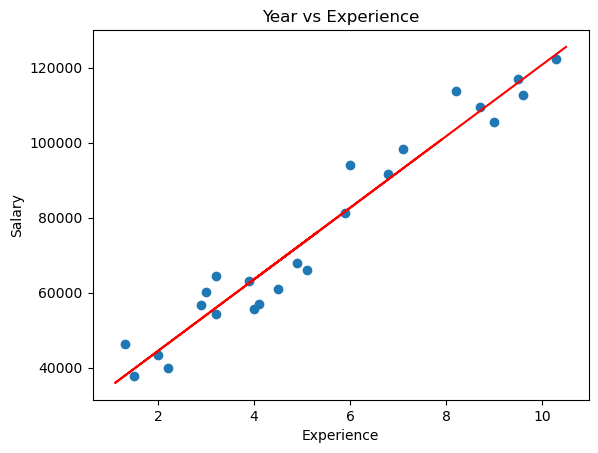

In [29]:
#visualize
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(x_train,y_train)
plt.plot(x_test,y_pred, color='r')
plt.title("Year vs Experience")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()